MAC0460 - Projeto
Members:
Luã Nowacki Scavacini Santilli - NUSP 11795492
João Vitor Magalhães Leite - NUSP 11849414

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from cifar10_model import CIFAR10TrainingModel
from torchvision import transforms
import torch.nn.functional as F
torch.manual_seed(420)

In [11]:
class SNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(3072, 50),
            nn.Tanh(),
            nn.Linear(50, 10)
        )

    def forward(self, x):
        return self.model(x)

In [12]:
snn_model = CIFAR10TrainingModel(model=SNN(),
                             learning_rate=1e-3,
                             optimizer=optim.Adam,
                             loss_fn=nn.CrossEntropyLoss())
snn_model.load_and_transform_data(transform_list=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
]))

Files already downloaded and verified


In [13]:
# %%time
# n_epochs = 10
# snn_model.train(n_epochs)

Epoch:   1 Training Acc: 0.386 Training Loss: 0.0275 Validation Acc: 0.363 Validation Loss: 0.0282
Epoch:   2 Training Acc: 0.406 Training Loss: 0.0268 Validation Acc: 0.372 Validation Loss: 0.0276
Epoch:   3 Training Acc: 0.411 Training Loss: 0.0265 Validation Acc: 0.385 Validation Loss: 0.0275
Epoch:   4 Training Acc: 0.423 Training Loss: 0.026 Validation Acc: 0.396 Validation Loss: 0.0271
Epoch:   5 Training Acc: 0.423 Training Loss: 0.026 Validation Acc: 0.398 Validation Loss: 0.0272
Epoch:   6 Training Acc: 0.435 Training Loss: 0.0255 Validation Acc: 0.403 Validation Loss: 0.027
Epoch:   7 Training Acc: 0.437 Training Loss: 0.0254 Validation Acc: 0.399 Validation Loss: 0.0269
Epoch:   8 Training Acc: 0.437 Training Loss: 0.0252 Validation Acc: 0.406 Validation Loss: 0.0268
Epoch:   9 Training Acc: 0.446 Training Loss: 0.025 Validation Acc: 0.403 Validation Loss: 0.0269
Epoch:  10 Training Acc: 0.451 Training Loss: 0.0248 Validation Acc: 0.41 Validation Loss: 0.0266
CPU times: tota

In [14]:
# snn_model.save_model('model/simple_neural_net.pth')

In [15]:
snn_model.load_model('model/simple_neural_net.pth')

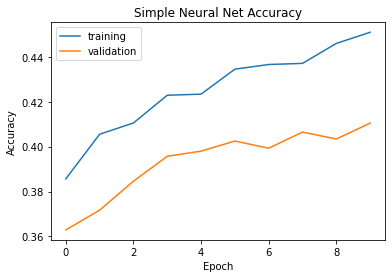

In [16]:
snn_model.plot_acc("Simple Neural Net Accuracy")

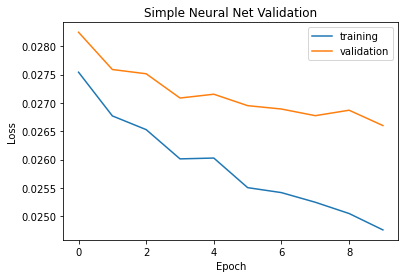

In [17]:
snn_model.plot_loss("Simple Neural Net Validation")

In [6]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
        self.fc1 = nn.Linear(4*4*64, 500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*64)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x

In [7]:
lenet_model = CIFAR10TrainingModel(model=LeNet(),
                                 learning_rate=1e-3,
                                 optimizer=optim.Adam,
                                 loss_fn=nn.CrossEntropyLoss())
lenet_model.load_and_transform_data(transform_list=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
]))

Files already downloaded and verified


In [8]:
%%time
n_epochs = 10
lenet_model.train(n_epochs)

Epoch:   1 Training Acc: 0.556 Training Loss: 0.0195 Validation Acc: 0.542 Validation Loss: 0.0199
Epoch:   2 Training Acc: 0.663 Training Loss: 0.0149 Validation Acc: 0.636 Validation Loss: 0.016
Epoch:   3 Training Acc: 0.714 Training Loss: 0.0128 Validation Acc: 0.675 Validation Loss: 0.0144
Epoch:   4 Training Acc: 0.749 Training Loss: 0.0113 Validation Acc: 0.695 Validation Loss: 0.0135
Epoch:   5 Training Acc: 0.778 Training Loss: 0.00997 Validation Acc: 0.711 Validation Loss: 0.0127


KeyboardInterrupt: 

In [9]:
lenet_model.save_model('model/lenet.pth')

In [10]:
lenet_model.load_model('model/lenet.pth')

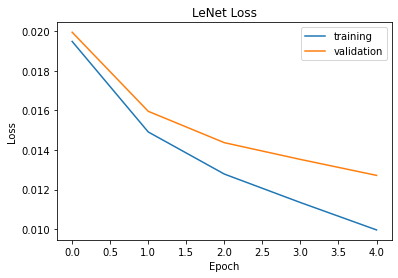

In [11]:
lenet_model.plot_loss('LeNet Loss')

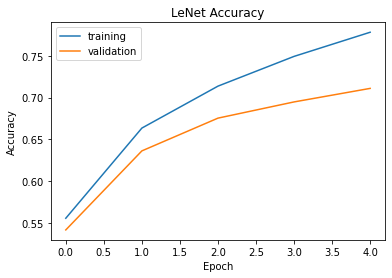

<Figure size 432x288 with 0 Axes>

In [12]:
lenet_model.plot_acc('LeNet Accuracy')

In [14]:
lenet_data_aug_model = CIFAR10TrainingModel(model=LeNet(),
                                           learning_rate=1e-3,
                                           optimizer=optim.Adam,
                                           loss_fn=nn.CrossEntropyLoss())

lenet_data_aug_model.load_and_transform_data(transform_list=transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
]))

Files already downloaded and verified


In [15]:
%%time
n_epochs = 3
lenet_data_aug_model.train(n_epochs)

Epoch:   1 Training Acc: 0.376 Training Loss: 0.0269 Validation Acc: 0.371 Validation Loss: 0.0274
Epoch:   2 Training Acc: 0.44 Training Loss: 0.0242 Validation Acc: 0.427 Validation Loss: 0.0246
Epoch:   3 Training Acc: 0.484 Training Loss: 0.0228 Validation Acc: 0.477 Validation Loss: 0.0232
CPU times: total: 21min 31s
Wall time: 3min 38s


In [16]:
lenet_data_aug_model.save_model('model/lenet_data_aug.pth')

In [17]:
lenet_data_aug_model.load_model('model/lenet_data_aug.pth')

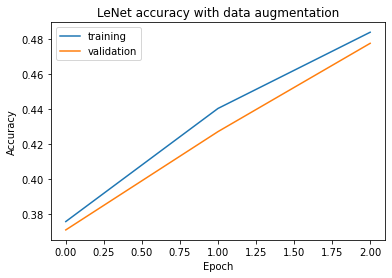

<Figure size 432x288 with 0 Axes>

In [18]:
lenet_data_aug_model.plot_acc("LeNet accuracy with data augmentation")

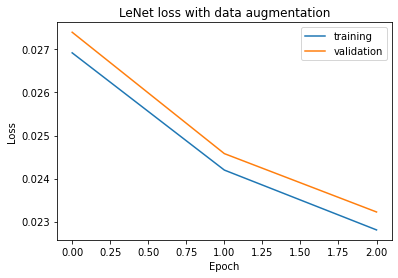

In [19]:
lenet_data_aug_model.plot_loss("LeNet loss with data augmentation")

In [22]:
from torchvision import models
from torchvision.models import AlexNet_Weights

In [24]:
alex_net = models.alexnet(AlexNet_Weights)
alex_net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [25]:
# Here we fix the features that will not be trained
for param in alex_net.features.parameters():
    param.requires_grad = False

In [27]:
# We also need to modify the final layer of the model. To output a 10-d vector instead of a 1000-d one.
n_inputs = alex_net.classifier[6].in_features
last_layer = nn.Linear(n_inputs, 10)
alex_net.classifier[6] = last_layer
alex_net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [37]:
alex_net_model = CIFAR10TrainingModel(model=alex_net,
                                     learning_rate=1e-3,
                                     optimizer=optim.Adam,
                                     loss_fn=nn.CrossEntropyLoss())

alex_net_model.load_and_transform_data(transform_list=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
]))

Files already downloaded and verified


In [38]:
%%time
n_epochs = 10
alex_net_model.overfit_single_batch(n_epochs)

AttributeError: 'CIFAR10TrainingModel' object has no attribute 'overfit_single_batch'

In [35]:
del CIFAR10TrainingModel